In [212]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import  train_test_split
import seaborn as sns

In [213]:
dataset = pd.read_csv('hiring.csv')
dataset.head(5)


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [214]:
exp ={'NaN':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11}

In [215]:
dataset['experience'] = dataset['experience'].map(exp)

In [216]:
dataset['experience'] = dataset['experience'].fillna(0)

In [217]:
mean = dataset['experience'].mean()

In [218]:
dataset['test_score(out of 10)'] = dataset['test_score(out of 10)'].fillna(mean)
dataset

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.00,9,50000
1,0.0,8.00,6,45000
2,5.0,6.00,7,60000
3,2.0,10.00,10,65000
4,7.0,9.00,6,70000
5,3.0,7.00,10,62000
6,10.0,4.75,7,72000
7,11.0,7.00,8,80000


In [219]:
x = dataset[['experience','test_score(out of 10)','interview_score(out of 10)']].values
y = dataset['salary($)'].values

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7)

In [221]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [222]:
lr.predict(x_test)

array([53050.84745763, 74661.01694915, 54406.77966102, 63220.33898305,
       76779.66101695, 55762.71186441])

In [223]:
lr.predict([[2,9,6]])

array([58135.59322034])

In [224]:
lr.score(x_test,y_test)

0.6527658080372818

<AxesSubplot:title={'center':'Correlation matrix'}>

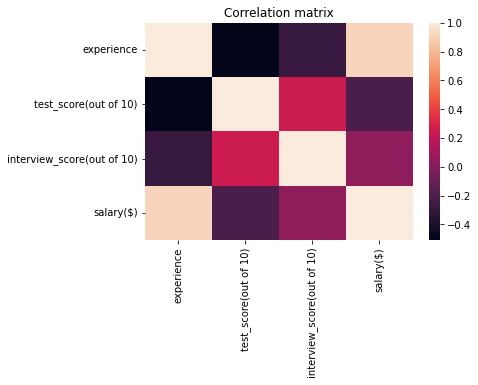

In [225]:
data = dataset.corr()
data
plt.title("Correlation matrix")
sns.heatmap(data=data)

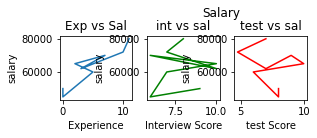

In [226]:
plt.suptitle("Salary")
plt.subplot(3,4,1)
plt.title("Exp vs Sal")
plt.xlabel("Experience")
plt.ylabel("salary")
plt.plot(dataset['experience'],y)

plt.subplot(3,4,2)
plt.title('int vs sal')
plt.xlabel("Interview Score")
plt.ylabel("salary")
plt.plot(dataset['interview_score(out of 10)'],y,color="green")


plt.subplot(3,4,3)  #args -> no.of row no.of col and grph no
plt.title('test vs sal')
plt.xlabel("test Score")
plt.ylabel("salary")
plt.plot(dataset['test_score(out of 10)'],y,color="red")

plt.show()